# CRISP-DM
----------------------

### Data Fundamentals con Python

#### Enero 2023

**Aurora Cobo Aguilera**

**The Valley**

----------------------


Como ejercicio resumen de todo, dejo una práctica opcional que recoge todos los pasos de CRISP-DM. Para su realización, deberás seleccionar un dataset particular y completar los pasos solo con la ayuda de la librería de Pandas.


## 1. Business Understanding

### Dataset: [Colocar enlace del dataset a utilizar]

Describir negocio/sector.

- Objetivo 1: Medir la media de compra...
- Objetivo 2: Conocer el máximo de...
- Objetivo 3: Ver diferencias entre...


A continuación debes leer los datos y ver la estructura que tienen. Investiga qué significa cada campo y qué información te es de utilidad.

In [15]:
import pandas as pd # pd is simply an alias 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from yellowbrick.classifier import ConfusionMatrix
df = pd.read_csv('Cancer_Data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [16]:
df.shape

(569, 33)

In [17]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

# **Data Cleaning, Correcting, Completing and Converting**

In [18]:
print('Train columns with null values:\n', df.isnull().sum())

Train columns with null values:
 id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fracta

We don't have any null values!

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [20]:
df['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, Length: 569, dtype: float64

We can see that column 32 represents a column full of NaNs, and it's called "Unnamed:32". We will need to delete that later.

## 2. Data Understanding

En este paso debes crearte un 'diccionario' de los datos de interés en el que anotes la información de éstos.

Para ello, anota si la variable es cualitativa o cuantitativa, qué tipo de datos (int, float, string...) tiene y lo que representa.


Col1: Variable cuali / canti. int/float. Representa...

In [21]:
df=df.drop(['id','Unnamed: 32'],axis=1)

print(df.shape)
df.head()

(569, 31)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## 3. Data Wrangling

Lo siguiente es preprocesar la información. Para ello aplica filtros, haz selección de columnas, prepara columnas nuevas manipulando otras...



In [22]:
df['diagnosis'].replace(['B', 'M'],
                        [0, 1], inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
df['diagnosis'].value_counts()

0    357
1    212
Name: diagnosis, dtype: int64

## 4. Visualización de Datos

Ayúdate de matplotlib además de las funciones de Pandas si lo necesitas para realizar las gráficas que veas oportunas de tus datos. Ellas te ayudarán a comprender mejor qué es lo que tienes.

Primero realizamos histogramas individuales de nestras variables para ver su distribución.

In [24]:
def plot_histograms(data, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(20,20))
    for i, col in enumerate(columns):
        sns.histplot(data[col], kde=False, ax=axes[i])
        axes[i].set_xlabel(col)
    plt.tight_layout()
    plt.show()

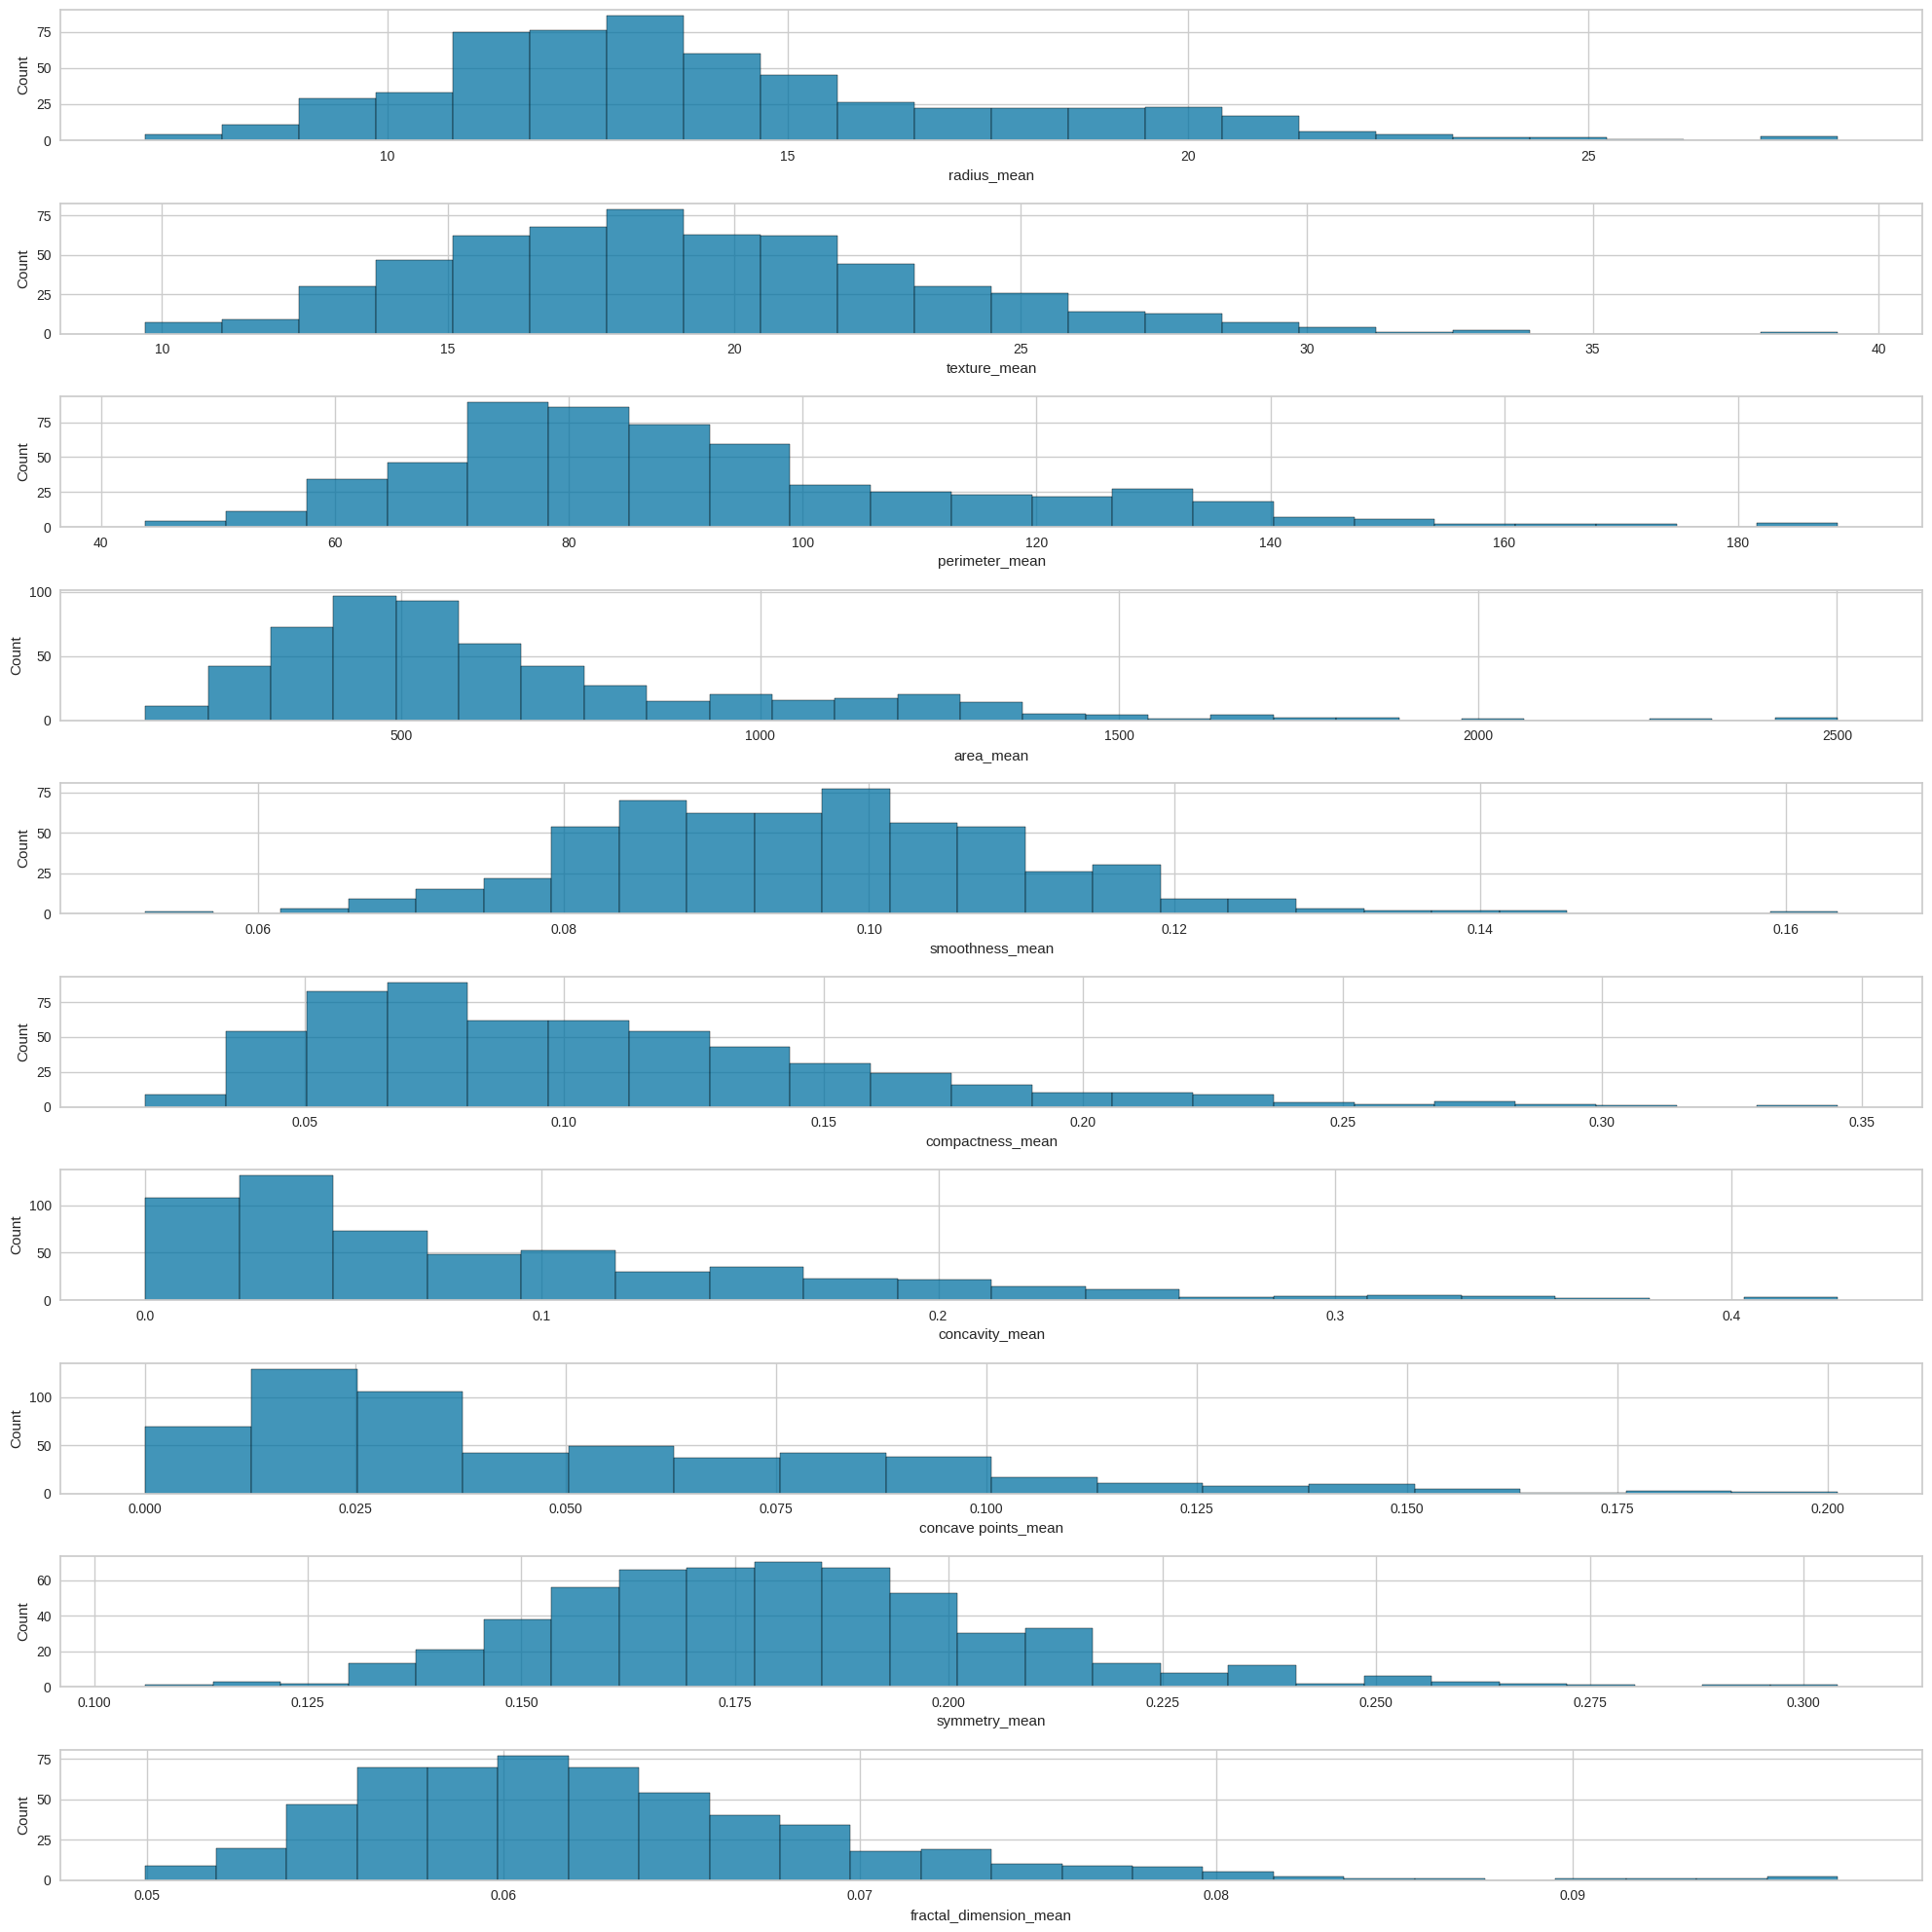

In [25]:
plot_columns=['radius_mean','texture_mean','perimeter_mean', 'area_mean',
              'smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']
plot_histograms(df, plot_columns)

Con los boxplot queremos ver los outliers y entender los valores medios y sus percentiles

In [36]:
def box_plot(data, columns):
    fig, axes = plt.subplots(nrows=len(columns), ncols=1, figsize=(10,50))
    for i, col in enumerate(columns):
        sns.boxplot(data[col], ax=axes[i])
        axes[i].set_xlabel(col)
    plt.tight_layout()
    plt.show()

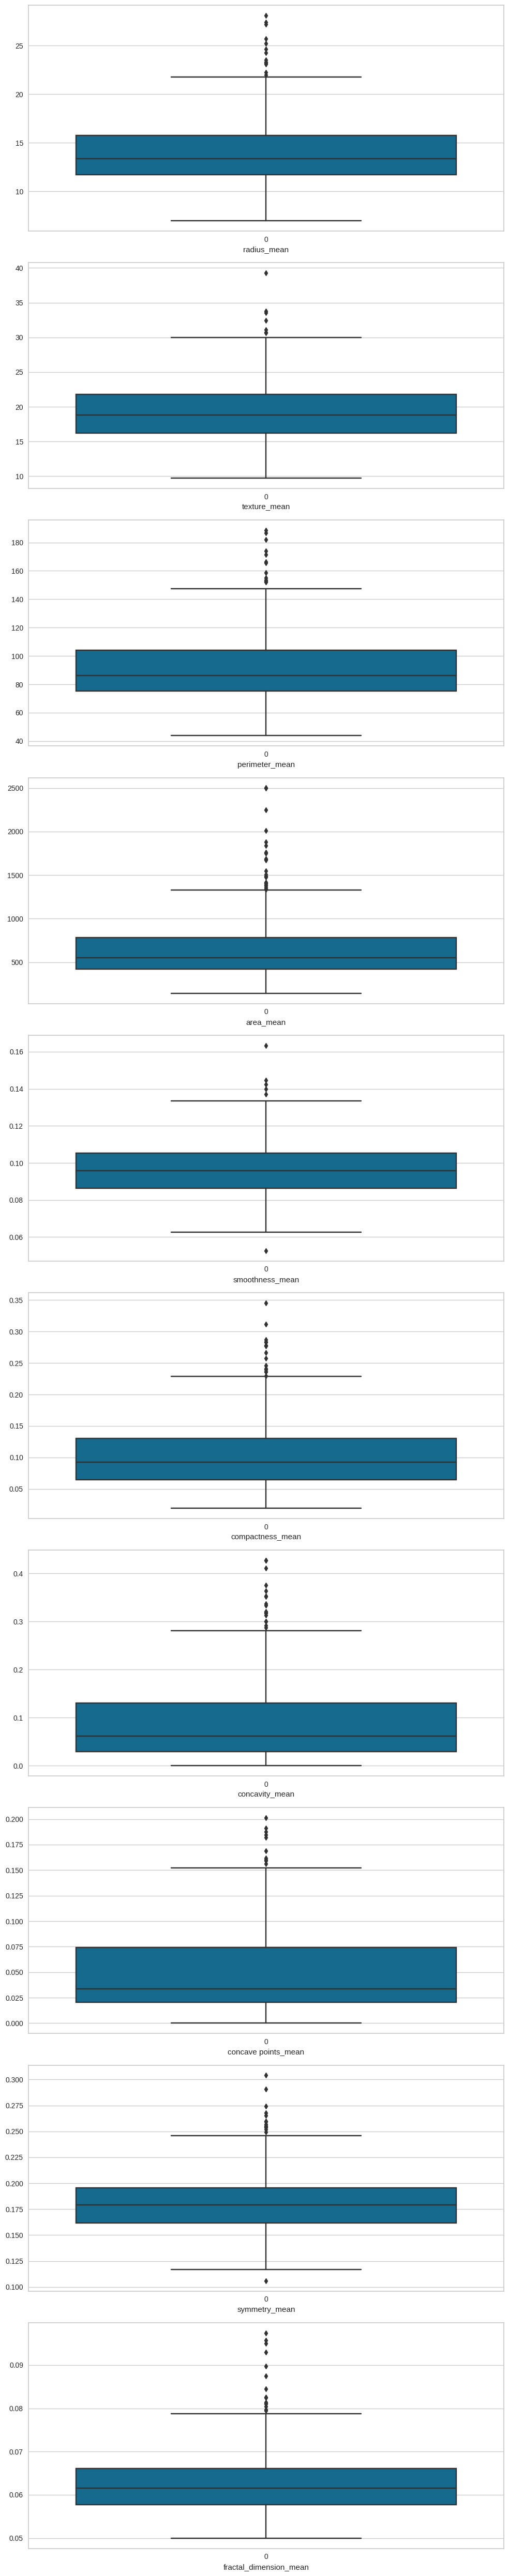

In [37]:
plot_columns=['radius_mean','texture_mean','perimeter_mean', 'area_mean',
              'smoothness_mean','compactness_mean','concavity_mean','concave points_mean','symmetry_mean','fractal_dimension_mean']
box_plot(df, plot_columns)

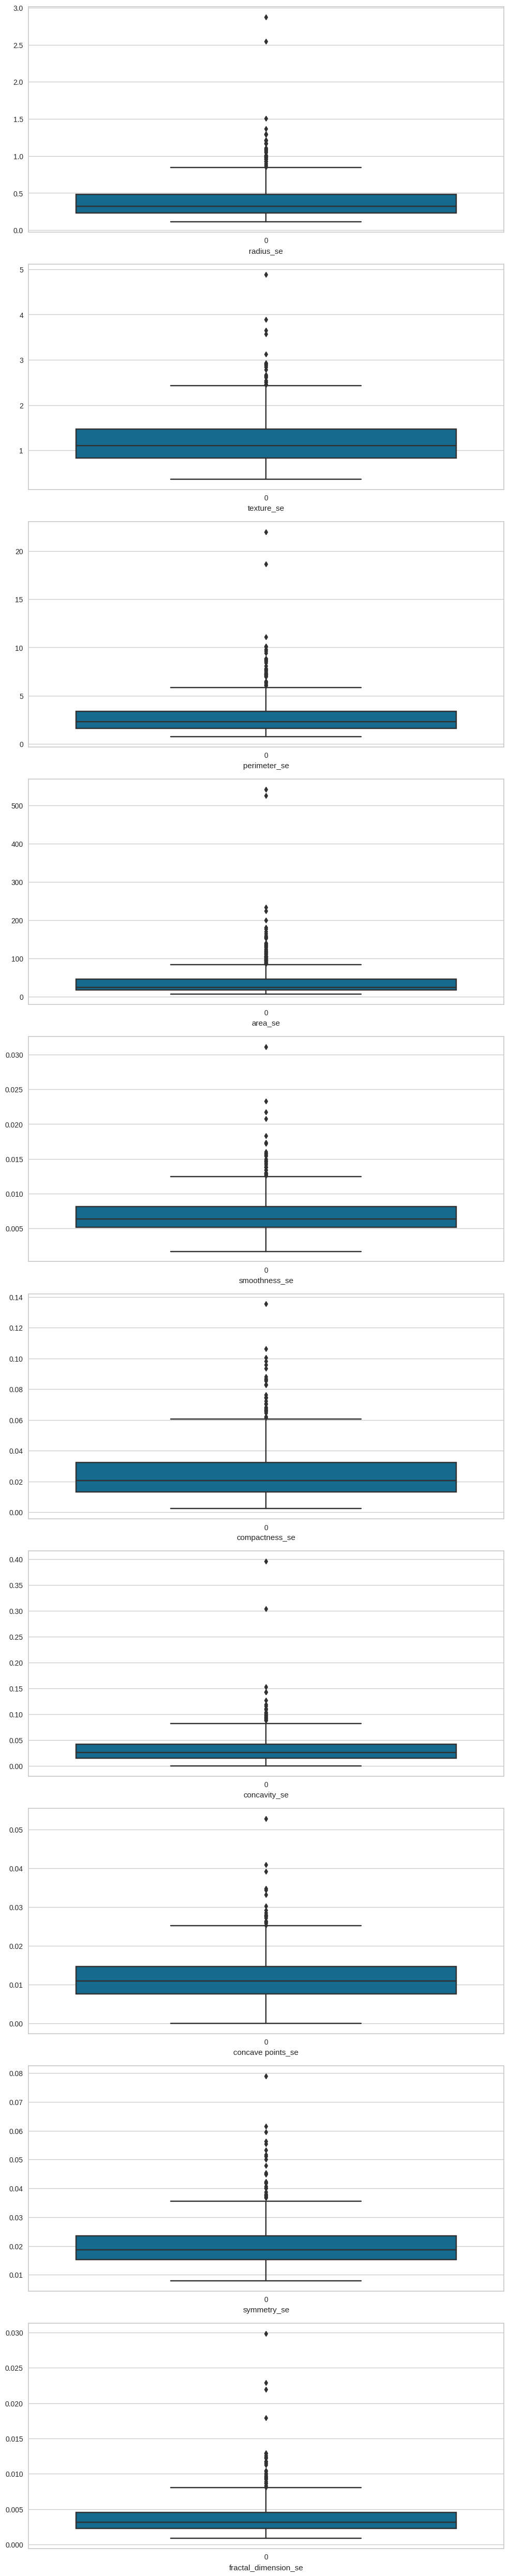

In [38]:
plot_columns=['radius_se','texture_se','perimeter_se', 'area_se',
              'smoothness_se','compactness_se','concavity_se','concave points_se','symmetry_se','fractal_dimension_se']
box_plot(df, plot_columns)

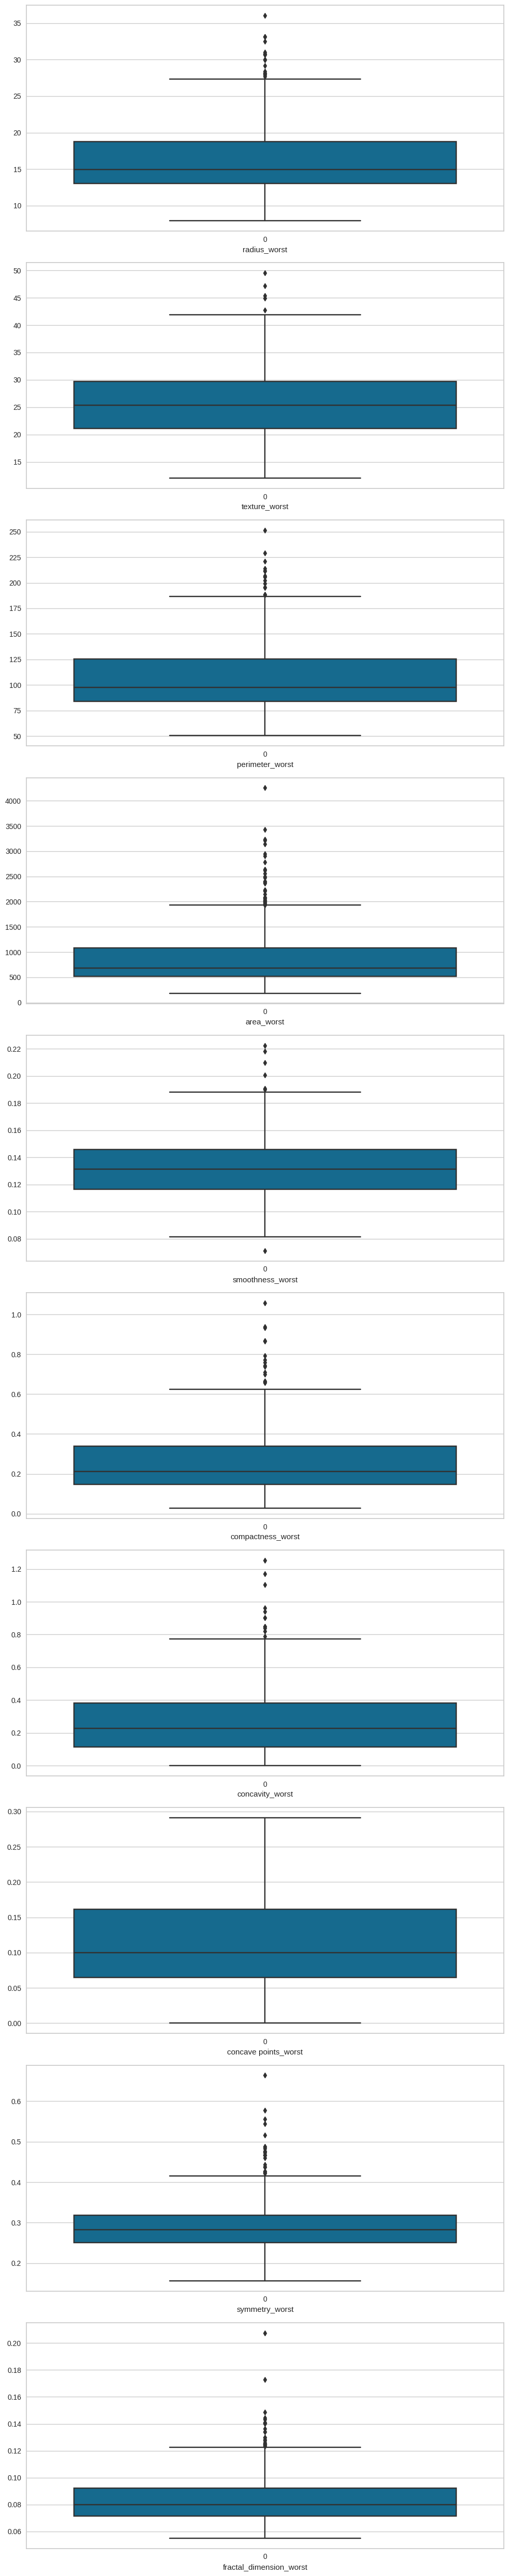

In [39]:
plot_columns=['radius_worst','texture_worst','perimeter_worst', 'area_worst',
              'smoothness_worst','compactness_worst','concavity_worst','concave points_worst','symmetry_worst','fractal_dimension_worst']
box_plot(df, plot_columns)

Realizamos un heatmap en el que enfrentamos todas las variables para ver si hay posible correlación (pero esto no implica no dependencia, solo implica que cambian a la vez y de forma lineal, por lo que tiene muchas limitaciones) entre ellas (esto es estadística, pero se pueden aplicar modelos (RandomForestRegressor(), features importance-regresión que te entrena parámetros para saber la importancia de los features)

<Axes: >

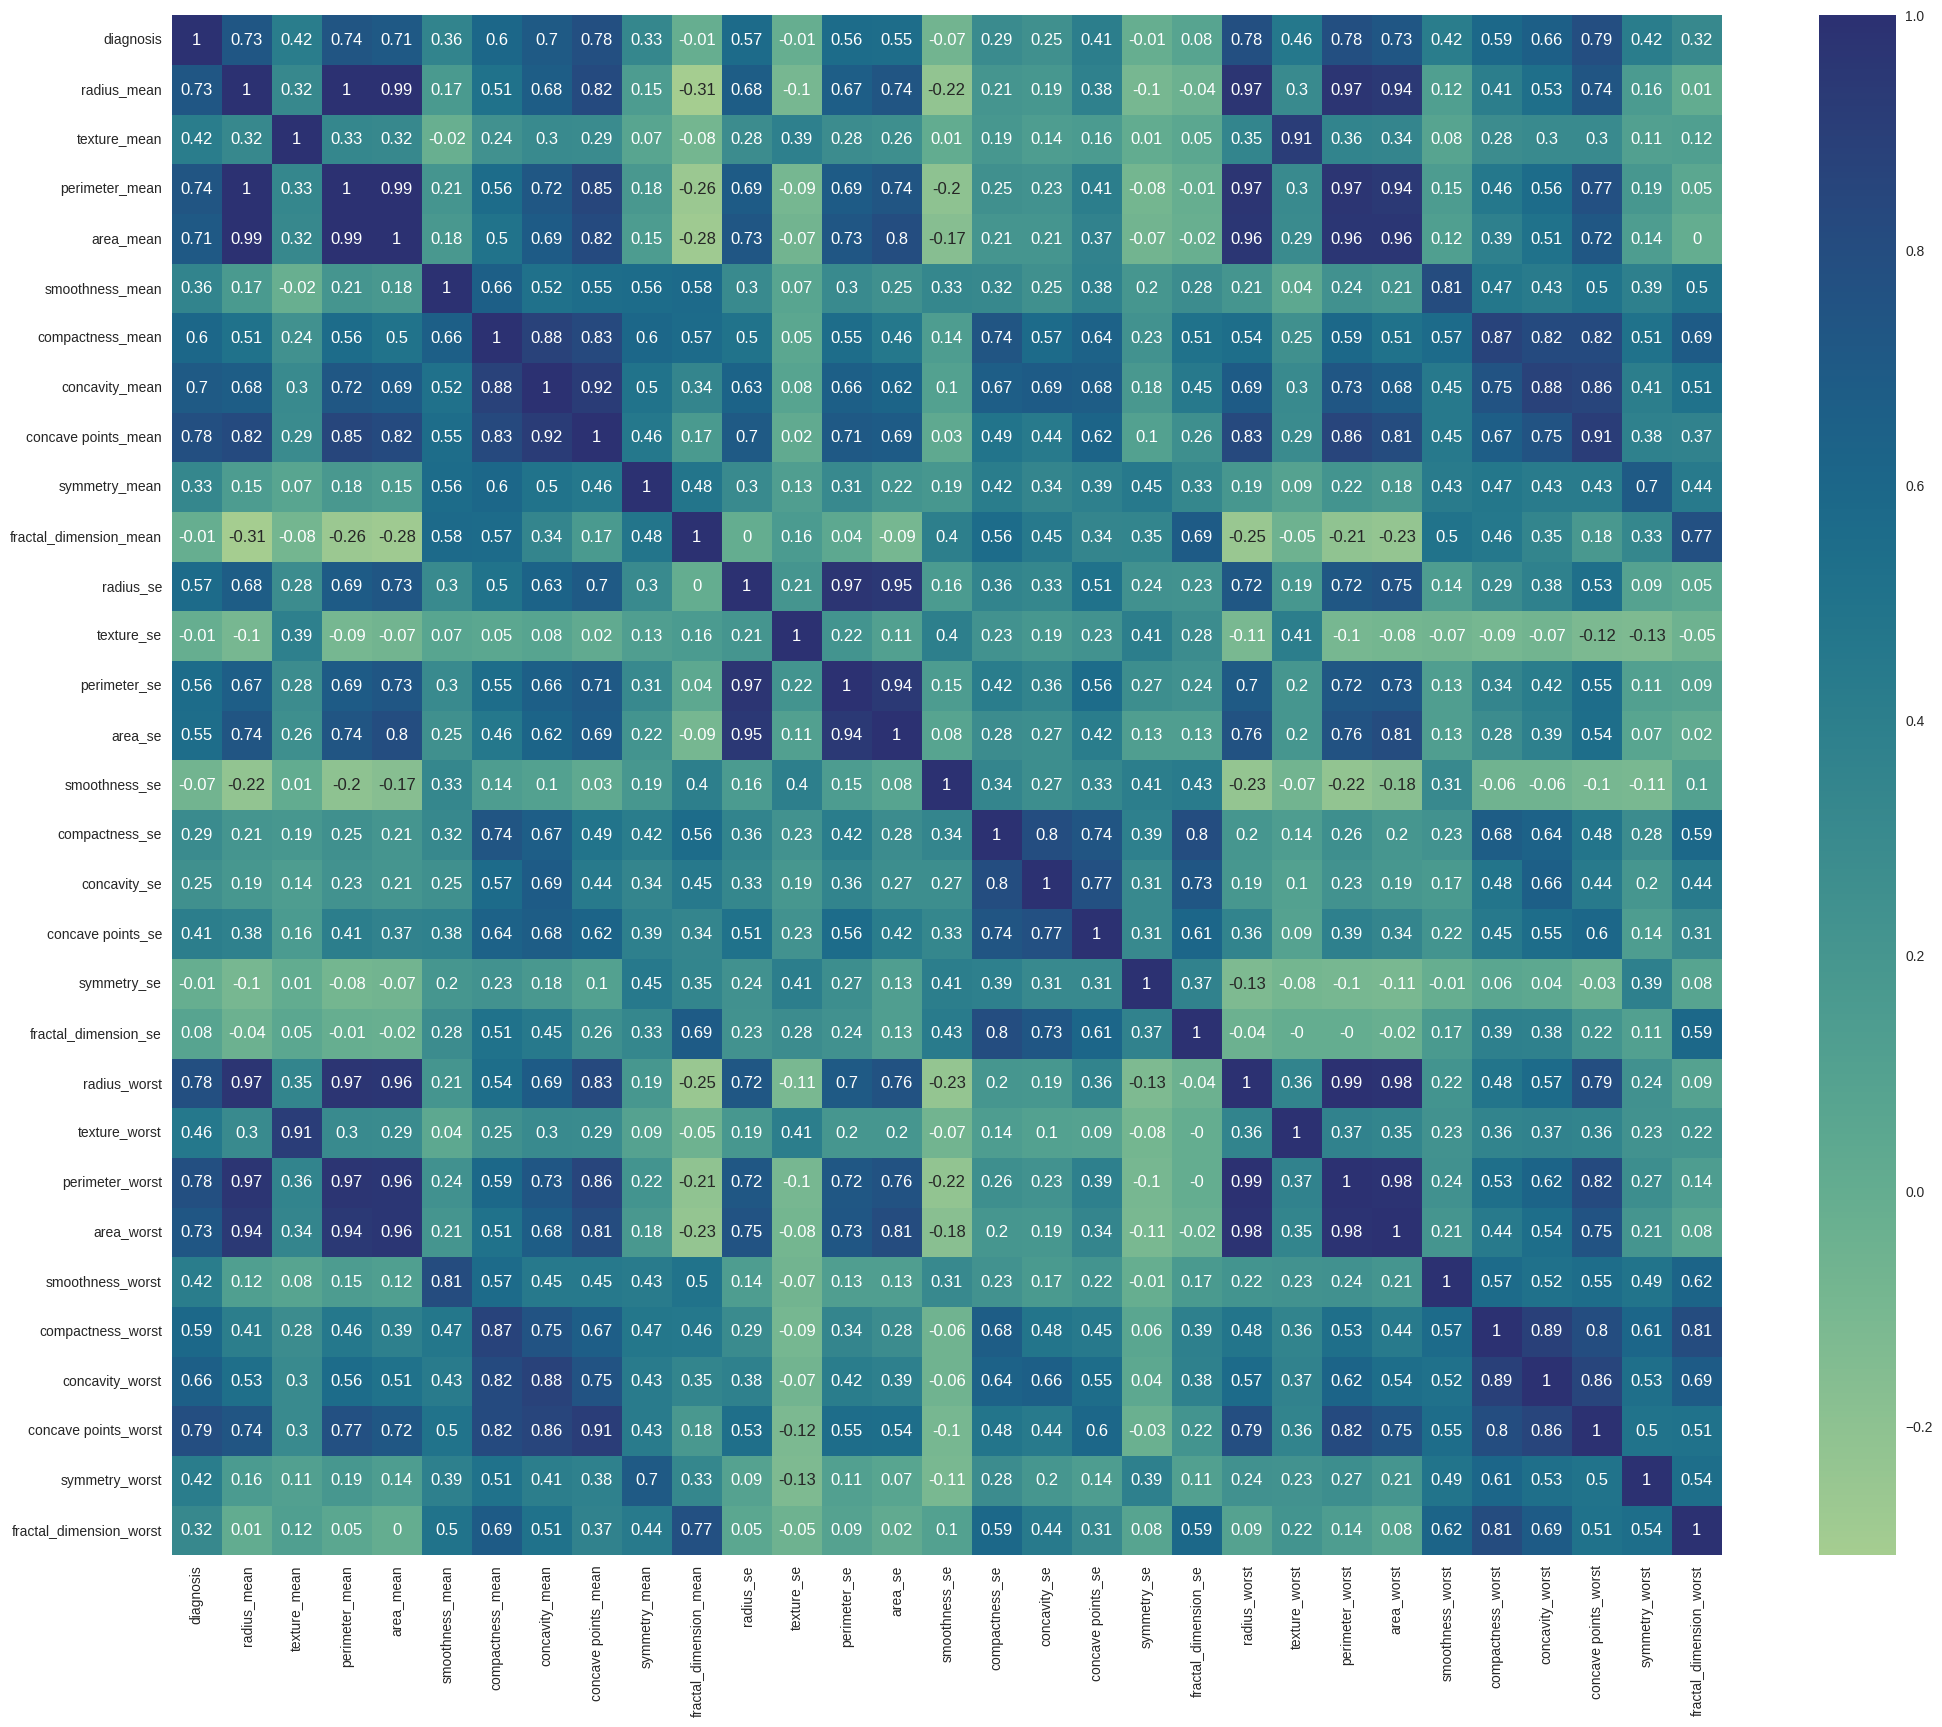

In [40]:
corr = df.corr().round(2)
plt.figure(figsize = (25,20))
sns.heatmap(corr, annot = True, cmap = 'crest')

Para estudiar los outliers:

In [41]:
df.shape

(569, 31)

In [42]:
## Remove the outliers
def drop_outliers(data,feature):
    iqr=1.5 * (np.percentile(data[feature],80)-np.percentile(data[feature],10))
    data.drop(data[data[feature]> (iqr+np.percentile(data[feature],80))].index,inplace=True)
    data.drop(data[data[feature]< (np.percentile(data[feature],10)-iqr)].index,inplace=True)

In [43]:
# select all numeric columns
numeric_cols = df.select_dtypes(include=np.number).columns.tolist()

# apply outlier removal to each numeric feature
for feature in numeric_cols:
    drop_outliers(df, feature)

In [44]:
df.shape

(444, 31)

Encode categorical variable

In [45]:
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
5,1,12.45,15.70,82.57,477.1,0.12780,0.17000,0.15780,0.08089,0.2087,...,15.47,23.75,103.4,741.6,0.1791,0.5249,0.5355,0.17410,0.3985,0.12440
6,1,18.25,19.98,119.60,1040.0,0.09463,0.10900,0.11270,0.07400,0.1794,...,22.88,27.66,153.2,1606.0,0.1442,0.2576,0.3784,0.19320,0.3063,0.08368
7,1,13.71,20.83,90.20,577.9,0.11890,0.16450,0.09366,0.05985,0.2196,...,17.06,28.14,110.6,897.0,0.1654,0.3682,0.2678,0.15560,0.3196,0.11510
8,1,13.00,21.82,87.50,519.8,0.12730,0.19320,0.18590,0.09353,0.2350,...,15.49,30.73,106.2,739.3,0.1703,0.5401,0.5390,0.20600,0.4378,0.10720
10,1,16.02,23.24,102.70,797.8,0.08206,0.06669,0.03299,0.03323,0.1528,...,19.19,33.88,123.8,1150.0,0.1181,0.1551,0.1459,0.09975,0.2948,0.08452


In [46]:
label_encoder=LabelEncoder()
df['diagnosis']=label_encoder.fit_transform(df['diagnosis'])

In [47]:
df['diagnosis'].values

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,

# 5. Parte predictiva

El siguiente paso tendrá que esperar a la semana que viene. Toca hacer Machine Learning!

Para que os vaya sonando...

- Normalización
- Correlaciones & PCA (Feature Engineering)
- scikit-learn/pytorch/caffe/keras/tensorflow...
- Train/Test
- ...

Creación de variables de test y de variables de entrenamiento

In [ ]:
X=df.drop('diagnosis',axis=1)
X=X.values
y=df['diagnosis']

In [49]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

Normalizamos los datos para tenerlos en la misma escala

In [52]:
scaler=StandardScaler()
X_train_std=scaler.fit_transform(X_train)
X_test_std=scaler.transform(X_test)

Aplicamos un PCA en los datos de entrenamiento

In [53]:
pca=PCA(n_components=X_train.shape[1])
pca.fit(X_train_std)

PCA(n_components=30)

Determinamos el número óptimo de componentes

In [54]:
explained_variance=pca.explained_variance_ratio_
cumulative_variance=np.cumsum(explained_variance)
n_components=np.argmax(cumulative_variance >=0.95)+1
print(f"selected num of components:{n_components}")

selected num of components:10


Transformamos el conjunto de datos de entrenamient y test con los componentes seleccionados

In [56]:
pca=PCA(n_components=n_components)
X_train_pca=pca.fit_transform(X_train)
X_test_pca=pca.transform(X_test_std)
X_train_pca

array([[ 1.20841663e+03, -1.03701514e+02, -9.48518452e+00, ...,
         6.82378950e-01,  3.04385946e-01, -1.28496649e-01],
       [-2.93681534e+02, -1.01204606e+01, -2.75799327e+00, ...,
        -2.08451579e-01,  8.69455388e-02,  1.25255364e-01],
       [ 3.83509059e+02, -1.63213218e-01, -9.06337986e+00, ...,
         3.22495171e-01, -9.35049961e-02,  2.55333839e-01],
       ...,
       [-2.67617581e+02,  7.93580286e+00, -4.70551182e+00, ...,
        -4.69878063e-02, -2.72747138e-02,  1.67901532e-02],
       [-5.57237000e+02, -1.58106959e+01,  9.11853498e+00, ...,
         6.68135045e-01, -1.39780805e-01, -1.91089346e-01],
       [ 5.31589150e+02, -7.65186949e+01,  2.11080608e+01, ...,
        -2.57338391e-01,  5.01666861e-02, -8.63834660e-02]])

Realizamos la selección del modelo y sintonizamos con los hiperparámetros

In [57]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV

In [58]:
lr=LogisticRegression(random_state=42)
knn=KNeighborsClassifier()
dt=DecisionTreeClassifier()
rf=RandomForestClassifier()
ada=AdaBoostClassifier()
xgb=XGBClassifier(eval_metric='logloss',use_label_encoder=False)

# parameter for KNN
para_knn={'n_neighbors':np.arange(1,50)}
grid_knn=GridSearchCV(knn,param_grid=para_knn,cv=5)

#parameter for decision tree
para_dt={'criterion':['gini','entropy'],'max_depth':np.arange(1,50),
         'min_samples_leaf':[1,2,4,5,10,20,30,40,50,80,100]}
grid_dt=GridSearchCV(dt,param_grid=para_dt,cv=5)

#parameter for Random Forest
params_rf={'n_estimators':[100,200,350,500],
           'min_samples_leaf':[2,10,30,50,80,100]}
grid_rf=GridSearchCV(rf,param_grid=params_rf,cv=5)

#parameters for AdaBoost
params_ada={'n_estimators':[50,100,250,400,500],
            'learning_rate':[0.1,0.001,0.2,0.5,0.8,1]}
grid_ada=GridSearchCV(ada,param_grid=params_ada,cv=5)

# paraameter for XGBoost
params_xgb={'n_estimators':[50,100,250,600,800,1000],
           'learning_rate':[0.1,0.001,0.2,0.5,0.8,1]}
rs_xgb=RandomizedSearchCV(xgb,param_distributions=params_xgb,cv=5)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


In [59]:
grid_knn.fit(X_train,y_train)
grid_dt.fit(X_train,y_train)
grid_rf.fit(X_train,y_train)
grid_ada.fit(X_train,y_train)
rs_xgb.fit(X_train,y_train)

print("Best parameters for KNN:", grid_knn.best_params_)
print("Best parameters for Decision Tree:", grid_dt.best_params_)
print("Best parameters for Random Forest:", grid_rf.best_params_)
print("Best parameters for AdaBoost:", grid_ada.best_params_)
print("Best parameters for XGBoost:", rs_xgb.best_params_)

/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")
/usr/local/lib/python3.10/dist-packages/xgboost/sklearn.py:1395: UserWarnin

Best parameters for KNN: {'n_neighbors': 9}
Best parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 4}
Best parameters for Random Forest: {'min_samples_leaf': 2, 'n_estimators': 500}
Best parameters for AdaBoost: {'learning_rate': 1, 'n_estimators': 100}
Best parameters for XGBoost: {'n_estimators': 1000, 'learning_rate': 0.2}


Ahora aplicamos algunos modelos 

In [60]:
lr=LogisticRegression(random_state=42)
dt=DecisionTreeClassifier(criterion='gini',max_depth=29,min_samples_leaf=4,random_state=42)
knn=KNeighborsClassifier(n_neighbors=9)
rf=RandomForestClassifier(n_estimators=100,min_samples_leaf=2,random_state=42)
ada=AdaBoostClassifier(n_estimators=100,learning_rate=1)
xgb=XGBClassifier(n_estimators=100,learning_rate=0.1)

In [61]:
classifiers = [('Logistic Regression', lr), ('K Nearest Neighbours', knn),
               ('Decision Tree', dt), ('Random Forest', rf), ('AdaBoost', ada),
               ('XGBoost', xgb)]

Y miramos cual de los modelos es más predictivo

In [62]:
from sklearn.metrics import accuracy_score
for classifier_name , classifier in classifiers:
    #Fit classifier to training set
    classifier.fit(X_train,y_train)
    
    #predict y_pred
    y_pred=classifier.predict(X_test)
    accuracy=accuracy_score(y_test,y_pred)
    
    #Evaluation the test set
    print('{:s} : {:.2f}'.format(classifier_name, accuracy))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression : 0.96
K Nearest Neighbours : 0.91
Decision Tree : 0.93
Random Forest : 0.91
AdaBoost : 0.96
XGBoost : 0.98


We can see from the model predictions's that we get the best accuracy from XGBoost(98%).Linear Regressionand AdaBoost has 96% accuracy that is quite good.

In [63]:
def print_classifier_reports(classifiers, X_train, y_train, X_test, y_test):
    for name, clf in classifiers:
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        print(f"Classification report for {name}:")
        print(classification_report(y_test, y_pred))

print_classifier_reports(classifiers, X_train, y_train, X_test, y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Classification report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97        71
           1       0.89      0.89      0.89        18

    accuracy                           0.96        89
   macro avg       0.93      0.93      0.93        89
weighted avg       0.96      0.96      0.96        89

Classification report for K Nearest Neighbours:
              precision    recall  f1-score   support

           0       0.93      0.96      0.94        71
           1       0.81      0.72      0.76        18

    accuracy                           0.91        89
   macro avg       0.87      0.84      0.85        89
weighted avg       0.91      0.91      0.91        89

Classification report for Decision Tree:
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        71
           1       0.83      0.83      0.83        18

    accuracy                           0.93   

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


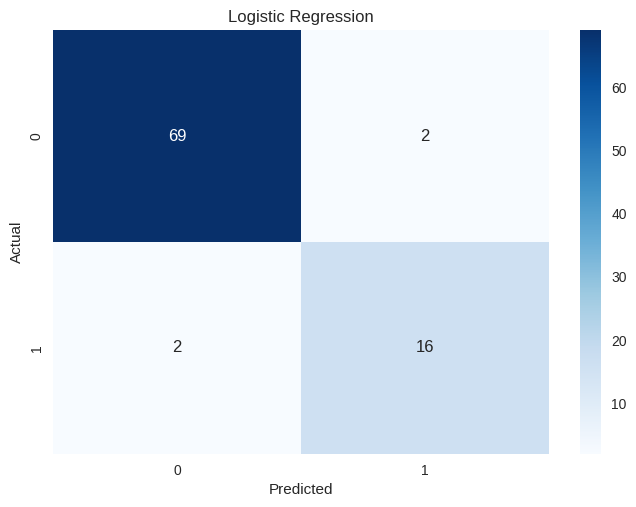

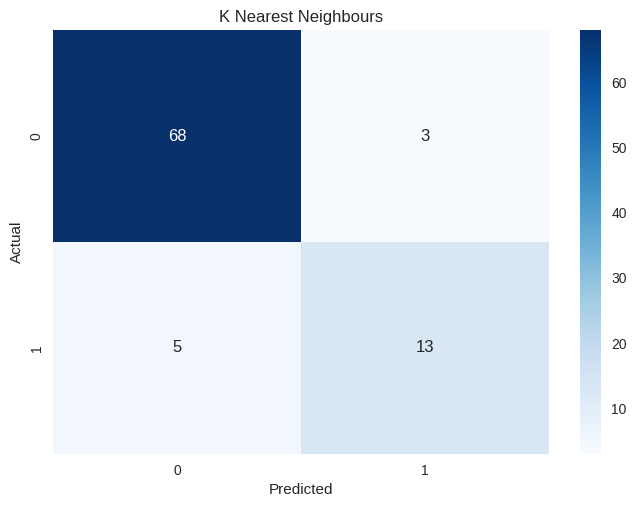

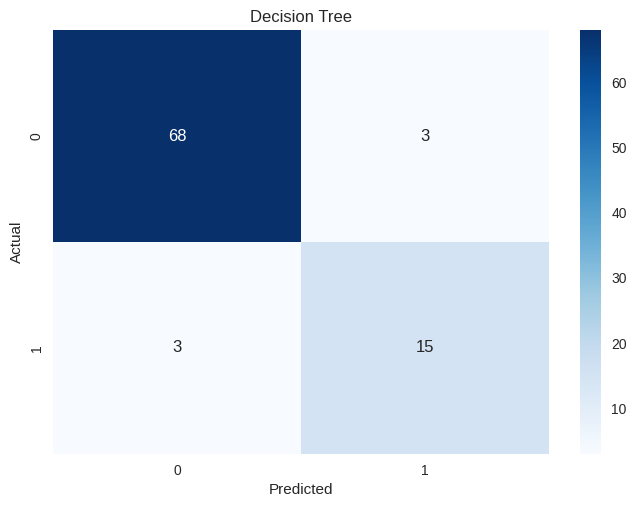

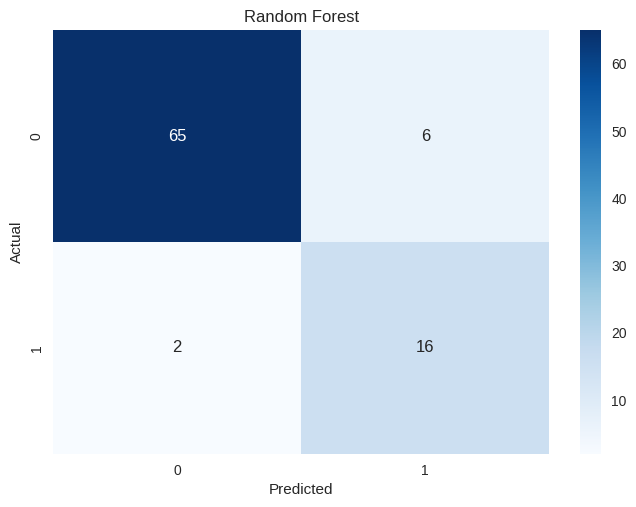

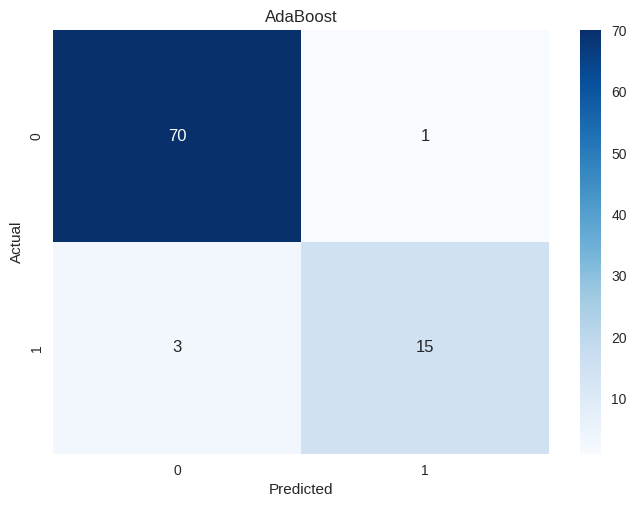

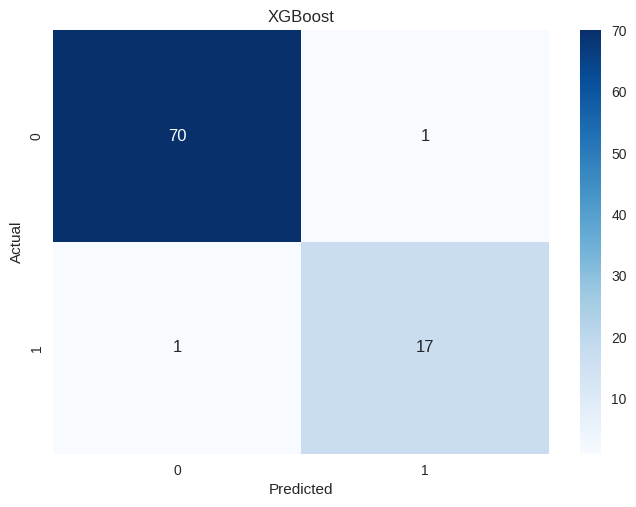

In [64]:
def print_confusion_matrix(classifiers, X_train, y_train, X_test, y_test):
    for name, clf in classifiers:
      clf.fit(X_train,y_train)
      y_pred=clf.predict(X_test)
      cm=confusion_matrix(y_test,y_pred)
      ax = plt.subplot()
      sns.heatmap(cm, annot=True, ax=ax, cmap='Blues')
      ax.set_xlabel('Predicted')
      ax.set_ylabel('Actual')
      ax.set_title(name)
      plt.show()

print_confusion_matrix(classifiers, X_train, y_train, X_test, y_test)